## Importer les librairies

In [98]:
using CSV
using DataFrames
using Distributions
using Gadfly
using GLM
using Plots
using Distances
import StatsBase       # Pour la standardisation des variables
using LinearAlgebra
using Statistics
include("functions.jl")

compute_VIF (generic function with 1 method)

## Traiter les données (PCA)

In [99]:
data = CSV.read("../train.csv")
y_train = data[end]


X_train = data[2:end-2] #omit id and diagnosis

data_test = CSV.read("../test.csv")
X_test = data_test[2:end-1]

id_test = data_test[1]


println(size(X_train))
println(size(X_test))

length_train = size(X_train)[1]
length_test = size(X_train)[1]


new_X = vcat(X_train, X_test)


(455, 9)
(114, 9)


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,16.641,21.3452,110.798,901.347,0.112388,0.145148,0.153247,0.0920613
2,13.6884,21.1035,90.5878,578.09,0.0941204,0.101193,0.035445,0.0235371
3,12.9131,14.3055,85.3309,511.539,0.0863069,0.136213,0.13536,0.0403623
4,12.9474,15.1198,86.2821,539.445,0.0925851,0.0849802,0.0937507,0.0347676
5,19.4972,24.8959,127.491,1200.37,0.101691,0.0989018,0.166237,0.0910854
6,17.9685,23.9732,113.391,995.763,0.0879695,0.0705786,0.0574004,0.0484731
7,23.3328,26.9409,158.255,1685.51,0.113154,0.208636,0.352201,0.162356
8,14.2786,19.7755,97.6468,627.095,0.076918,0.224775,0.30016,0.077536
9,15.1174,17.6523,97.2838,674.5,0.11765,0.129638,0.153654,0.086759


In [100]:
X = convert(Array{Float64}, new_X)

Z = standardize(X)

# Décomposition en valeurs singulières de la matrice rectangulaire Z
F = svd(Z)

# Extraction de la matrice U
U = F.U

# Extraction de la matrice V
V = F.V

# Extraction des valeurs singulières
γ = F.S

9-element Array{Float64,1}:
 55.606320316656166
 31.749866666246565
 22.21585053748662
 15.9016642797877
 13.54214253899776
  7.216412349511594
  4.507732722999022
  2.93171068052257
  1.046590648235249

## Visualiser les données

<img id="myimage" src="pair.png" style=" height:500px; width:500px;">





## Version Agrandie par souci de lisibilité


<div class="img-zoom-container", style="overflow:auto; height:550px; width:5669px;">
  <img id="myimage" src="pair.png" style=" height:5669px; width:5669px;">>
</div>


In [101]:
Gadfly.set_default_plot_size(150cm, 150cm)

matrix = Array{Plot}(undef, 10, 10)

column = names(data)[2:end-1]
i = 1
for c1 in column
    j = 1
    for c2 in column
        if (i == j)
            matrix[i,j] = Gadfly.plot(data, x = c1, Geom.histogram(bincount = 30), color = :diagnosis)
        else
            matrix[i,j] = Gadfly.plot(data, x = c1, y = c2, color = :diagnosis)
        end
        j+=1
    end 
    i+=1
end 


#grid = gridstack(matrix) # graphing is so computationnally hard that it makes the jupyter bug

println("Graphing is done")

Graphing is done


## Faire le modèle KNN

### Le concept en général

Le K-nearest neighbors algorithm est un algorithme de classification assez simple. Il se base sur le fait que les features points d'une classe devraient, généralement, se trouver proche des autres points de la même classe (ils devraient être clustered si nous normalisons les données). En se basant sur ce principe, un KNN va tout simplement prendre ces prédictions sur la distance que le point du testing set a avec les points du training set. Une fois que ces distances se font calculer, il faudra prendre les K points qui sont les plus proches du point à prédire. Grâce aux K points trouvés et à leurs classes respectives, nous allons pouvons classifier nos nouveaux points (les points du testing set).

### Des aspects spécifiques à notre implémentation

Premièrement, le KNN que nous avons implémenté utilise la distance euclidienne entre les points (aussi connu sous le nom de "L2 norm"). C'est important de le mentionné, car il y a plus d'une façon de faire le calcul d'une distance. Toutefois, nous avons choisis celle-là vu qu'elle est plus populaire. Ensuite, ce qu'il faut savoir c'est qu'un KNN, en général, nécessite que ces entrées soient normalisé. En effet, cela est du au fait que nous trouvons la distance entre deux points et que si les entrées ne sont pas normalisés, alors une différence dans l'orde de grandeur des variables explicatives va jouer sur l'importance des variables (une variable avec une plus grande orde de grandeur pourrait sembler plus importante ce qu'elle est vraiment vu que les distances de cette variable seront plus grandes). Finalement, pour trouver un K qui devrait donner un bon score, il est courant de faire du K-fold cross validation avec le training data pour savoir quel K pourrait être bon avec le testing set (celui qui pourrait bien généraliser). De plus, nous avons limités notre recherche du K optimal à des K impairs pour la simple raison que nous voulons que la classification se fasse avec une majorité (ce qui pourrait ne pas arriver si la moitié des K points les plus proches soient d'une certaine classe et l'autre moitié de l'autre classe).


In [102]:
function calculateDist(vec1, vec2)
    dist = 0
    taille = size(vec1)[1]
    for i = 1:taille
        dist += (vec1[i]-vec2[i])^2
    end
    
    return dist
end

function findMin(n, tab, used_indexes)
    mini_pos = 1
    mini = tab[mini_pos]
    
    for i = 2:length(tab)
        if (tab[i] < mini && !(i in used_indexes))
            mini_pos = i
            mini = tab[i]
        end
    end
    return mini_pos
end


function findIndexesNSmallest(n, tab)
    temp = copy(tab)
    indexes = []
    for i = 1:n
        new_index = findMin(n, temp, indexes)
        push!(indexes, new_index)
    end
    

    return indexes
end

function predict(k, X_train, y_train, X_test) #works best with odd k    
    nb_data = size(X_train)[1]
    
    distances = []
    for elem in 1:nb_data
        push!(distances, calculateDist(X_test, X_train[elem, :]))
    end
    
    indexes_distances = findIndexesNSmallest(k, distances)
    
    nb_0 = 0
    for index in indexes_distances
        if (y_train[index] == 0)
            nb_0 += 1
        end
    end
    
    return convert(Int8, (nb_0 < k - nb_0))
    
end

function knn(k, X_train, y_train, X_test)
    ans = []
    for elem in 1:size(X_test)[1]
        push!(ans, predict(k, X_train, y_train, X_test[elem, :]))
    end
    return ans
end




knn (generic function with 1 method)

## K-fold cross validation

In [103]:
# K-cross validation
function findAllIndexes(length, nb_blocks)
    return [(convert(Int16, floor((i-1)*length/nb_blocks))+1, convert(Int16, floor(i*length/nb_blocks))) for i = 1:nb_blocks]
end

function countTFPN(t_label, predictions)
    TP, FP, FN, TN = 0, 0, 0, 0
    taille = size(t_label)[1]
    for i = 1:taille
        if(t_label[i] == 1 && predictions[i] == 1)
            TP += 1
        elseif(t_label[i] == 1 && predictions[i] == 0)
            FN += 1
        elseif(t_label[i] == 0 && predictions[i] == 1)
            FP += 1
        elseif(t_label[i] == 0 && predictions[i] == 0)
            TN += 1
        end
            
    end
    return TP, FP, FN, TN
end

function computeMetrics(t_label, predictions)
    TP, FP, FN, TN = countTFPN(t_label, predictions)
    precision, recall, accuracy = (TP/(TP + FP)), (TP/(TP + FN)), ((TP+TN)/(TP + FP + FN + TN))
    return [precision, recall, accuracy]
end

function split_train_test(X, y, index)
    sub_X_train = [X[1 : index[1]-1, :]; X[index[2] : end, :]]
    sub_X_test = X[index[1] : index[2], :]
    sub_y_train = [y[1 : index[1]-1]; y[index[2] : end]]
    true_y_test = y[index[1] : index[2]]
    return sub_X_train, sub_X_test, sub_y_train, true_y_test
end


function KCrossValidation(k, X, y, nb_blocks = 15)
    indexes = findAllIndexes(size(X_test)[1],nb_blocks)
    ans = []
    for interval = indexes
        sub_X_train, sub_X_test, sub_y_train, true_y_test = split_train_test(X, y, interval)
        sub_y_test =  knn(k, sub_X_train, sub_y_train, sub_X_test)
        push!(ans, computeMetrics(true_y_test, sub_y_test))
    end
    temp = mean(ans)
    return temp
end


KCrossValidation (generic function with 2 methods)

## Trouver le K qui minimise l'erreur selon les métriques

In [104]:
mat = γ[1] *U[:, 1]*V[:,1]'

X_train = mat[1:length_train, :]
X_test = mat[length_train+1:end, :]

println(size(X_train))
println(size(X_test))
println(size(y_train))
println(size(y_test))



(455, 9)
(114, 9)
(455,)
(114,)


In [105]:
spy_matrix = Array{AbstractFloat}(undef, 10, 9)
spy_matrix_text = Array{Plots.PlotText}(undef, 10, 9)
for j = 1:9
    println("Index : ", j)
    
    mat = γ[1] *U[:, 1]*V[:,1]'
    for k = 2:j
        mat += γ[k] *U[:, k]*V[:,k]'
    end
    

    X_train = mat[1:length_train, :]

    X_test = mat[length_train+1:end, :]
    metrics = []
    gen_temp = 1:2:19
    for i = 1:2:19
        temp = KCrossValidation(i, X_train, y_train)
        if (i ==  1)
            metrics = [[elem] for elem = temp]
        else
            taille = size(temp)[1]
            for index = 1:taille
                push!(metrics[index], temp[index])
            end
        end

    end
    ks = [i for i = gen_temp]

    
    precision = metrics[1]
    recall = metrics[2]
    for index = 1:length(precision)
        f1 = 2*(precision[index] * recall[index])/(precision[index] + recall[index])
        println("F1 score ",index*2 - 1,  "NN : ", f1)
        spy_matrix[index,j] = f1
        spy_matrix_text[index,j] = Plots.text(round(f1, digits=4),9)
    end
    
end


Index : 1
F1 score 1NN : 0.9221887550200802
F1 score 3NN : 0.9303482587064676
F1 score 5NN : 0.9242521367521368
F1 score 7NN : 0.9242521367521368
F1 score 9NN : 0.9242521367521368
F1 score 11NN : 0.9242521367521368
F1 score 13NN : 0.9242521367521368
F1 score 15NN : 0.9242521367521368
F1 score 17NN : 0.9242521367521368
F1 score 19NN : 0.9242521367521368
Index : 2
F1 score 1NN : 0.9188835147118097
F1 score 3NN : 0.9472140762463342
F1 score 5NN : 0.9505552308591466
F1 score 7NN : 0.9193689157435381
F1 score 9NN : 0.9193689157435381
F1 score 11NN : 0.9111111111111111
F1 score 13NN : 0.9166329966329966
F1 score 15NN : 0.9166329966329966
F1 score 17NN : 0.9166329966329966
F1 score 19NN : 0.9111111111111111
Index : 3
F1 score 1NN : 0.8784722222222223
F1 score 3NN : 0.9134751773049645
F1 score 5NN : 0.9388560157790926
F1 score 7NN : 0.9247914581247915
F1 score 9NN : 0.9166329966329966
F1 score 11NN : 0.9305472636815919
F1 score 13NN : 0.9305472636815919
F1 score 15NN : 0.9166329966329966
F1 sc

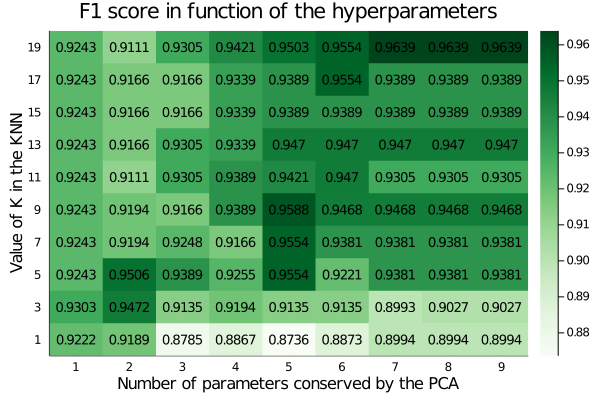

In [106]:
Gadfly.set_default_plot_size(12cm, 12cm)
Axis_k = ["1","3","5","7","9","11","13","15","17","19"]
Axis_PCA = ["1","2","3","4","5","6","7","8","9"]
p = heatmap(Axis_PCA,Axis_k,spy_matrix,
    ylabel ="Value of K in the KNN",
    xlabel = "Number of parameters conserved by the PCA",
    title = "F1 score in function of the hyperparameters",
    c=:Greens
)
annotate!( vec(tuple.((1:length(Axis_PCA))'.-0.5, (1:length(Axis_k)).-0.5, spy_matrix_text)) )


## Faire les prédictions sur le testing set 

Nous allons prendre un des K trouver précédemment qui avait obtenu un bon score.


In [107]:
k = 9

mat = γ[1] *U[:, 1]*V[:,1]'
for i = 2:5
    mat += γ[i] *U[:, i]*V[:,i]'
end
X_train = mat[1:length_train, :]
X_test = mat[length_train+1:end, :]

y_test = knn(k, X_train, y_train, X_test)
prediction = DataFrame(id = id_test, diagnosis = y_test)
CSV.write("KNN.csv",prediction)

"KNN.csv"